# Network generation

This notebook creates an underlying network for a city, given census tracts

The underlying network is defined as follows; two census tracts are connected by an edge if they are 1. adjacent, 2. have a GTFS route that connects them

In [2]:
import geopy.distance
from shapely import wkt
import warnings
from shapely.errors import ShapelyDeprecationWarning
import geopandas as gp
import pandas as pd
from shapely.geometry import Point, Polygon, MultiLineString
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## Read in census tracts for city of interest

shapely file should be used

In [3]:
poly = gp.read_file('./input_network_files/varanasi_zones.shp')
centers = gp.read_file('./input_network_files/zone_centroids.shp')
poly['source'] = 'Shapefile 1'
centers['source'] = 'Shapefile 2'
census = gp.GeoDataFrame(pd.concat([poly, centers], ignore_index=True), crs='epsg:4326')
# census['geometry'] = census['geometry'].apply(wkt.loads)
# census = gp.GeoDataFrame(centers, crs='epsg:4326')

In [4]:
census

,premiumdat,tru,no_hh,tot_p,avghhsz_cy,objectid,id,name,subdistric,district,...,TIME_ST,Shape_Leng,Shape_Area,Zone,W_ID,Ward,layer,path,geometry,source
0,1.513951,Rural,305.0,2484.0,8.144262,303025.0,9187995440163,Gudiya,Pindra,Varanasi,...,None,NaN,NaN,None,None,None,Difference,MultiPolygon?crs=EPSG:4326&field=premiumdat:do...,"POLYGON ((82.68919 25.25703, 82.68891 25.25685...",Shapefile 1
1,0.284187,Rural,5.0,50.0,10.000000,303124.0,9187996438984,Sarasaul,Sadar,Varanasi,...,None,NaN,NaN,None,None,None,Difference,MultiPolygon?crs=EPSG:4326&field=premiumdat:do...,"POLYGON ((82.82121 25.20226, 82.82156 25.20225...",Shapefile 1
2,0.283808,Rural,85.0,543.0,6.388235,303125.0,9187996439030,Bahadurpur,Sadar,Varanasi,...,None,NaN,NaN,None,None,None,Difference,MultiPolygon?crs=EPSG:4326&field=premiumdat:do...,"POLYGON ((82.82961 25.19743, 82.82979 25.19719...",Shapefile 1
3,0.949396,Rural,144.0,914.0,6.347222,303126.0,9187996439077,Gurudaspur,Sadar,Varanasi,...,None,NaN,NaN,None,None,None,Difference,MultiPolygon?crs=EPSG:4326&field=premiumdat:do...,"POLYGON ((82.75843 25.25841, 82.75637 25.25611...",Shapefile 1
4,0.765413,Rural,265.0,1812.0,6.837736,303127.0,9187996439360,Kachhariya,Sadar,Varanasi,...,None,NaN,NaN,None,None,None,Difference,MultiPolygon?crs=EPSG:4326&field=premiumdat:do...,"POLYGON ((82.83243 25.22818, 82.83204 25.22780...",Shapefile 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,NaN,None,NaN,NaN,NaN,NaN,None,None,None,None,...,2019-04-14,3149.196242,193927.629637,Kotwali,W084,Garwasitola,Ward_Boundary,C:/My Research/3. Varansi PTS _DST_NSF/varanas...,POINT (83.01286 25.31297),Shapefile 2
2838,NaN,None,NaN,NaN,NaN,NaN,None,None,None,None,...,2019-04-14,4704.238521,227458.512180,Kotwali,W085,Kaalbhairo,Ward_Boundary,C:/My Research/3. Varansi PTS _DST_NSF/varanas...,POINT (83.01518 25.31650),Shapefile 2
2839,NaN,None,NaN,NaN,NaN,NaN,None,None,None,None,...,2019-04-14,3181.380599,204093.037518,Kotwali,W065,Beniya,Ward_Boundary,C:/My Research/3. Varansi PTS _DST_NSF/varanas...,POINT (83.00649 25.31423),Shapefile 2
2840,NaN,None,NaN,NaN,NaN,NaN,None,None,None,None,...,2019-04-14,2799.518234,207608.426000,Kotwali,W081,Dashashwamedh,Ward_Boundary,C:/My Research/3. Varansi PTS _DST_NSF/varanas...,POINT (83.01026 25.30930),Shapefile 2


Show census tracts

<Axes: >

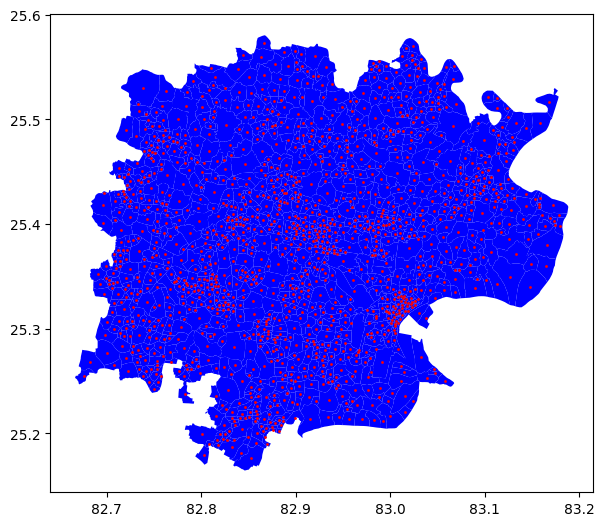

In [5]:
ax = census[census['source'] == 'Shapefile 1'].plot(color='blue', figsize=(7, 7))
census[census['source'] == 'Shapefile 2'].plot(color='red', markersize=1,ax=ax)

In [10]:
polys = gp.GeoDataFrame(poly, crs='epsg:4326')
centers = gp.GeoDataFrame(centers, crs='epsg:4326')
polys['name'] = polys['name'].fillna(polys['Ward'])
centers['Ward'] = centers['Ward'].fillna(centers['name'])
gdf = polys.merge(centers, left_on='name', right_on='Ward')

In [11]:
gdf_unique = gdf.drop_duplicates(subset=['geometry_y'])
gdf_unique = gdf_unique.drop_duplicates(subset=['geometry_x'])

In [12]:
gdf_unique.columns

Index(['premiumdat_x', 'tru_x', 'no_hh_x', 'tot_p_x', 'avghhsz_cy_x',
       'objectid_x', 'id_x', 'name_x', 'subdistric_x', 'district_x', 'state_x',
       'country_x', 'censusname_x', 'villagenam_x', 'lgd_villag_x',
       'lgd_vill_1_x', 'lgd_subdis_x', 'lgd_distri_x', 'lgd_statec_x',
       'censuscode_x', 'censusco_1_x', 'censusco_2_x', 'level_x',
       'st_areasha_x', 'st_lengths_x', 'shp_area_x', 'Z_ID_x', 'CLASS_x',
       'SUB_CLASS_x', 'W_NUM_x', 'W_AREA_x', 'W_POP_x', 'W_HH_x', 'W_HH_WC_x',
       'W_HH_SC_x', 'W_PROP_x', 'W_SL_AR_x', 'TIME_ST_x', 'Shape_Leng_x',
       'Shape_Area_x', 'Zone_x', 'W_ID_x', 'Ward_x', 'layer_x', 'path_x',
       'geometry_x', 'source_x', 'premiumdat_y', 'tru_y', 'no_hh_y', 'tot_p_y',
       'avghhsz_cy_y', 'objectid_y', 'id_y', 'name_y', 'subdistric_y',
       'district_y', 'state_y', 'country_y', 'censusname_y', 'villagenam_y',
       'lgd_villag_y', 'lgd_vill_1_y', 'lgd_subdis_y', 'lgd_distri_y',
       'lgd_statec_y', 'censuscode_y', 'censu

In [13]:
gdf_unique = gdf_unique.drop(columns=['premiumdat_x', 'tru_x', 'no_hh_x', 'tot_p_x', 'avghhsz_cy_x',
       'objectid_x', 'id_x', 'subdistric_x', 'district_x', 'state_x',
       'country_x', 'censusname_x', 'villagenam_x', 'lgd_villag_x',
       'lgd_vill_1_x', 'lgd_subdis_x', 'lgd_distri_x', 'lgd_statec_x',
       'censuscode_x', 'censusco_1_x', 'censusco_2_x', 'level_x',
       'st_areasha_x', 'st_lengths_x', 'shp_area_x', 'Z_ID_x', 'CLASS_x',
       'SUB_CLASS_x', 'W_NUM_x', 'W_AREA_x', 'W_POP_x', 'W_HH_x', 'W_HH_WC_x',
       'W_HH_SC_x', 'W_PROP_x', 'W_SL_AR_x', 'TIME_ST_x',
       'Shape_Area_x', 'Zone_x', 'W_ID_x', 'layer_x', 'path_x',
       'source_x', 'premiumdat_y', 'tru_y', 'no_hh_y', 'tot_p_y',
       'avghhsz_cy_y', 'objectid_y', 'id_y', 'subdistric_y',
       'district_y', 'state_y', 'country_y', 'censusname_y', 'villagenam_y',
       'lgd_villag_y', 'lgd_vill_1_y', 'lgd_subdis_y', 'lgd_distri_y',
       'lgd_statec_y', 'censuscode_y', 'censusco_1_y', 'censusco_2_y',
       'level_y', 'st_areasha_y', 'st_lengths_y', 'shp_area_y', 'Z_ID_y',
       'CLASS_y', 'SUB_CLASS_y', 'W_NUM_y', 'W_AREA_y', 'W_POP_y', 'W_HH_y',
       'W_HH_WC_y', 'W_HH_SC_y', 'W_PROP_y', 'W_SL_AR_y', 'TIME_ST_y',
       'Shape_Area_y', 'Zone_y', 'W_ID_y', 'layer_y',
       'path_y', 'source_y', 'Shape_Leng_x', 'Ward_x','name_y','Shape_Leng_y'])

In [14]:
gdf_unique

,name_x,geometry_x,Ward_y,geometry_y
0,Gudiya,"POLYGON ((82.68919 25.25703, 82.68891 25.25685...",Gudiya,POINT (82.67556 25.25494)
1,Sarasaul,"POLYGON ((82.82121 25.20226, 82.82156 25.20225...",Sarasaul,POINT (82.81953 25.19942)
2,Bahadurpur,"POLYGON ((82.82961 25.19743, 82.82979 25.19719...",Bahadurpur,POINT (82.82746 25.19378)
6,Gurudaspur,"POLYGON ((82.75843 25.25841, 82.75637 25.25611...",Gurudaspur,POINT (82.75247 25.25612)
7,Kachhariya,"POLYGON ((82.83243 25.22818, 82.83204 25.22780...",Kachhariya,POINT (82.82568 25.22347)
...,...,...,...,...
1712,Garwasitola,"MULTIPOLYGON (((83.01671 25.31338, 83.01647 25...",Garwasitola,POINT (83.01286 25.31297)
1713,Kaalbhairo,"POLYGON ((83.01736 25.31877, 83.01736 25.31876...",Kaalbhairo,POINT (83.01518 25.31650)
1714,Beniya,"POLYGON ((83.00579 25.31715, 83.00579 25.31714...",Beniya,POINT (83.00649 25.31423)
1715,Dashashwamedh,"POLYGON ((83.01044 25.31185, 83.01044 25.31175...",Dashashwamedh,POINT (83.01026 25.30930)


In [26]:
mapped_list = [index for index,string in enumerate(gdf_unique["name_x"].tolist())]

In [27]:
mapped_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Get adjacent census tracts and cost of edge between census tracts

In [28]:
poly = gdf_unique['geometry_x'].tolist()
name = mapped_list
point = gdf_unique['geometry_y'].tolist()
# lat = gdf_unique["INTPTLAT"].tolist()
# lon = census["INTPTLON"].tolist()

edges = []
for (p1,i,a) in zip(poly,name, point):
    for (p2,j,b) in zip(poly, name,point):
        if type(p1.intersection(p2)) is MultiLineString:
            if i != j:
                c = geopy.distance.geodesic((a.x,a.y),(b.x,b.y)).km
                edges.append([i,j,c,a.x,a.y,b.x,b.x])
for e in edges:
    print(e)

[0, 43, 0.8290552023040911, 82.67555935698661, 25.254937903264402, 82.68278564087133, 82.68278564087133]
[1, 6, 0.6549205264287524, 82.81952548405287, 25.199418464383243, 82.82538934648296, 82.82538934648296]
[1, 9, 0.5412453847467563, 82.81952548405287, 25.199418464383243, 82.82426368521344, 82.82426368521344]
[1, 11, 2.1298434817213723, 82.81952548405287, 25.199418464383243, 82.80045391612548, 82.80045391612548]
[1, 12, 0.28898768115226386, 82.81952548405287, 25.199418464383243, 82.81704653713092, 82.81704653713092]
[2, 6, 0.24109710369614532, 82.82745695447717, 25.1937799923718, 82.82538934648296, 82.82538934648296]
[2, 8, 0.46709478570690555, 82.82745695447717, 25.1937799923718, 82.8232747102646, 82.8232747102646]
[2, 404, 1.753832599133165, 82.82745695447717, 25.1937799923718, 82.8431079875069, 82.8431079875069]
[2, 461, 0.5750109478068373, 82.82745695447717, 25.1937799923718, 82.83252647036639, 82.83252647036639]
[3, 5, 0.6164774989273489, 82.75246544060484, 25.256123303803708, 8

In [29]:
df = pd.DataFrame(edges, columns=['origin','destination','cost','lat_o','lon_o','lat_d','lon_d'])

In [34]:
df.to_csv('../networks/edge_list.csv',index=False)